In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read and filter data

In [2]:
df = pd.read_csv('avazu_medium.csv')
df.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [3]:
df.shape

(100000, 24)

In [4]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col + " " + str(len(df[col].unique())))

id 100000
click 2
hour 1
C1 6
banner_pos 5
site_id 893
site_domain 780
site_category 16
app_id 704
app_domain 55
app_category 19
device_id 7202
device_ip 40376
device_model 2473
device_type 4
device_conn_type 4
C14 420
C15 5
C16 6
C17 128
C18 4
C19 37
C20 137
C21 29


We can use sklearn to transform all the features into numerical ones:

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['site_id','site_domain','site_category','app_id','app_domain',
            'app_category','device_model','device_id','device_ip']:
    le.fit(list(df[col]))
    df[col] = le.transform(df[col])
    
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,104,742,2,656,23,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,104,742,2,656,23,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,104,742,2,656,23,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,104,742,2,656,23,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,881,439,0,656,23,...,1,0,18993,320,50,2161,0,35,-1,157


Since we are not provided an user id, we are going to use the device ip to identify users:

In [6]:
len(df['device_ip'].unique())

40376

device_ip
35026    355
4507     357
32714    370
24490    376
16896    838
Name: device_ip, dtype: int64
Users that appear less than 2 times: 63.04%
Users that appear less than 5 times: 91.27%
Users that appear less than 10 times: 97.2%


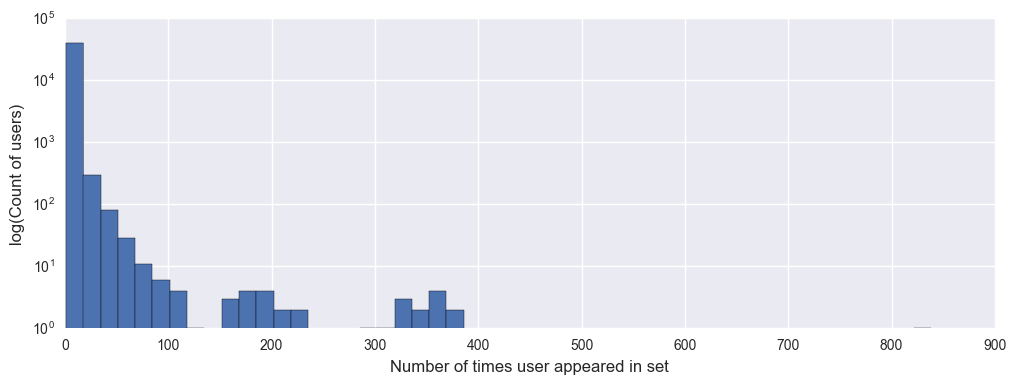

In [7]:
uuid_counts = df.groupby('device_ip')['device_ip'].count().sort_values()

print(uuid_counts.tail())

for i in [2, 5, 10]:
    print('Users that appear less than {} times: {}%'.format(i, round((uuid_counts < i).mean() * 100, 2)))
    
plt.figure(figsize=(12, 4))
plt.hist(uuid_counts.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()

#sns.countplot(x='device_ip', data=df)

In [8]:
df['device_ip'].value_counts()

16896    838
24490    376
32714    370
4507     357
35026    355
13711    353
18505    353
31326    336
11268    336
679      330
26577    325
10418    322
21712    308
1130     291
21429    226
36210    220
13200    214
23614    208
16199    201
40230    200
24281    196
29791    191
26777    184
14005    176
27229    173
26331    171
16822    167
16505    167
8321     153
13703    131
        ... 
36237      1
19963      1
40335      1
26000      1
38222      1
36173      1
34124      1
7455       1
15579      1
1244       1
30268      1
5342       1
34060      1
17978      1
38158      1
24121      1
22072      1
27921      1
11831      1
32019      1
17684      1
19733      1
21782      1
9782       1
11545      1
13594      1
13876      1
1308       1
1586       1
0          1
Name: device_ip, dtype: int64

Now we select only the users which have at least 50 occurrences in the dataset:

In [9]:
n = df['device_ip'].value_counts()[df['device_ip'].value_counts()>=50].index
df = df.loc[df['device_ip'].isin(n)]
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,104,742,2,656,23,...,1,2,15706,320,50,1722,0,35,-1,79
16,10003585669470236873,0,14102100,1005,0,749,467,14,656,23,...,1,0,17914,320,50,2043,2,39,-1,32
23,10004765361151096125,1,14102100,1005,0,104,742,2,656,23,...,1,0,15701,320,50,1722,0,35,-1,79
28,10005649443863261125,0,14102100,1005,0,317,605,4,656,23,...,1,0,20366,320,50,2333,0,39,-1,157
29,10005951398749600249,0,14102100,1005,0,104,742,2,656,23,...,1,0,15706,320,50,1722,0,35,-1,79


After filtering the users, we are left with about 1/10 of the original dataset:

In [10]:
df.shape

(11859, 24)

And also the number of users is greatly reduced:

In [11]:
len(df['device_ip'].unique())

83

In [12]:
len(df['device_id'].unique())

116

The ratio no/yes in the clicks is about 2/10:

In [13]:
df['click'].value_counts()

0    9966
1    1893
Name: click, dtype: int64

# Build the new dataset

In [ ]:
df['hour'] = df['hour'].apply(lambda x: str(x)[6:]) # hour
df = df.drop('id', 1) # remove id
df.head()

In [ ]:
grouped = df.groupby(['device_ip'])
k = 9
l = []
for name, group in grouped:
    user_interactions = group.groupby('click') # there will be 2 groups: 0/1
    try:
        ones = user_interactions.get_group(1)
    except:
        print('no ones')
        continue
    zeros = user_interactions.get_group(0)
    # compute the number of splits per user and split the interactions
    num_of_splits = len(zeros)//k
    splits = np.array_split(zeros, num_of_splits)
    # build the rounds with k-zeros rewards a 1-one reward
    for index_and_row, split in zip(ones.iterrows(), splits):
        r = pd.concat([split, index_and_row[1].to_frame().transpose()])
        # add the round to the list (after shuffling)
        if len(r)>10:
            r.drop(r.index[:len(r)-10], inplace=True)
        l.append(r.iloc[np.random.permutation(len(r))])


In [ ]:
import random
random.shuffle(l)
l[550]

Sanity checks:

In [ ]:
print(len(l))

In [ ]:
d = {}
for i in l:
    try:
        d[len(i)] += 1
    except:
        d[len(i)] = 1
d

In [ ]:
processed = pd.concat(l)
processed.shape

# One-hot encoding

In [ ]:
pd.get_dummies(processed['C18']).head()

In [ ]:
rewards = pd.DataFrame(processed['click'])
rewards.head()

In [ ]:
#rewards.to_csv('reward_list.csv')

In [ ]:
col = ['C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18']
final = pd.concat([pd.get_dummies(processed[c]) for c in col], axis=1)
final = final.div(final.sum(axis=1), axis=0) # normalize
final.head()

In [ ]:
final.shape

In [ ]:
#final.to_csv('processed10k.csv')

In [ ]:
users = pd.DataFrame(processed['device_ip'])
users.head()

In [ ]:
print(users['device_ip'].sort_values())

In [ ]:
le = LabelEncoder()
le.fit(list(users['device_ip']))
users['device_ip'] = le.transform(users['device_ip'])
sorted(users['device_ip'].unique())

In [ ]:
#users.to_csv('users.csv')

How it looks like:

In [ ]:
t = 0
processed.iloc[t*10:t*10+10]